In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import os
import warnings
import numpy as np
from sklearn.preprocessing import MinMaxScaler
sns.set_theme(font_scale=1.75)

## Multiple videos comparison

In [2]:
# Rutas a los directorios
openface_dir = "C:/Users/AdrianLopez/OneDrive - Universidad Politécnica de Madrid/Documentos/Semestre7/Project/VisualFeaturesExtraction/FinalBalanced/OpenFace/CSV"
pyfeat_dir = "C:/Users/AdrianLopez/OneDrive - Universidad Politécnica de Madrid/Documentos/Semestre7/Project/VisualFeaturesExtraction/FinalBalanced/PyFeat"

# Lee los archivos CSV que terminan con ".csv"
dfs_openface = [pd.read_csv(os.path.join(openface_dir, video)) for video in os.listdir(openface_dir) if video.endswith(".csv")]
dfs_pyfeat = [pd.read_csv(os.path.join(pyfeat_dir, video)) for video in os.listdir(pyfeat_dir) if video.endswith(".csv")]

In [3]:
len(dfs_openface), len(dfs_pyfeat)

(18, 18)

In [4]:
class MultipleAUEstimationComparison:
    def __init__(self, df_openface_list, df_pyfeat_list):
        self.df_openface_list = df_openface_list
        self.df_pyfeat_list = df_pyfeat_list
        self.common_columns = ['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10', 'AU12','AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU25', 'AU26']
    
    @staticmethod
    def preprocess_openface(df):
        """
        Preprocesses column names in a DataFrame by removing leading spaces and replacing them with underscores.

        Args:
            df (pd.DataFrame): Input DataFrame.

        Returns:
            pd.DataFrame: New DataFrame with cleaned column names.
        """
        common_columns =  ['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10', 'AU12','AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU25', 'AU26']
        df.columns = df.columns.str.strip().str.replace(' ', '')
        prefix = 'AU'
        sufix = '_r'
        selected_columns = df.filter(like=prefix).filter(like=sufix)
        selected_columns.columns = selected_columns.columns.str.replace(sufix, '')

        # Scale the data using MinMaxScaler
        scaler = MinMaxScaler()
        scaled_data = pd.DataFrame(scaler.fit_transform(selected_columns), columns=selected_columns.columns)

        # Select common columns 
        preprocessed_openface = scaled_data[common_columns]
        return preprocessed_openface
    
    @staticmethod
    def preprocess_pyfeat(df):
        common_columns = ['AU01', 'AU02', 'AU04', 'AU05', 'AU06', 'AU07', 'AU09', 'AU10', 'AU12','AU14', 'AU15', 'AU17', 'AU20', 'AU23', 'AU25', 'AU26']
        prefix = 'AU'
        selected_columns = df.filter(like=prefix)

        scaler = MinMaxScaler()
        scaled_data = pd.DataFrame(scaler.fit_transform(selected_columns), columns=selected_columns.columns)
        # Select common columns 
        preprocessed_pyfeat = selected_columns[common_columns]
        return preprocessed_pyfeat 

    def preprocess_data(self):
        self.df_openface_processed_list = [self.preprocess_openface(df) for df in self.df_openface_list]
        self.df_pyfeat_processed_list = [self.preprocess_pyfeat(df) for df in self.df_pyfeat_list]

    
    

In [5]:
comparison = MultipleAUEstimationComparison(dfs_openface, dfs_pyfeat)
comparison.preprocess_data()

In [6]:
# Mostrar los shapes de todos los preprocesados de openface y pyfeat
for df in comparison.df_openface_processed_list:
    print(df.shape)

(232, 16)
(459, 16)
(459, 16)
(459, 16)
(367, 16)
(459, 16)
(459, 16)
(367, 16)
(459, 16)
(459, 16)
(367, 16)
(459, 16)
(367, 16)
(459, 16)
(459, 16)
(459, 16)
(367, 16)
(459, 16)


In [7]:
for df in comparison.df_pyfeat_processed_list:
    print(df.shape)

(232, 16)
(459, 16)
(459, 16)
(459, 16)
(367, 16)
(459, 16)
(557, 16)
(367, 16)
(459, 16)
(459, 16)
(367, 16)
(459, 16)
(367, 16)
(459, 16)
(459, 16)
(459, 16)
(367, 16)
(459, 16)


In [8]:
# Printea los que tienen diferente shape para ver si hay algun problema
for i in range(len(comparison.df_openface_processed_list)):
    if comparison.df_openface_processed_list[i].shape != comparison.df_pyfeat_processed_list[i].shape:
        # Elimina las ultimas filas de la que tiene mas filas par que tengan el mismo shape, es un df
        if comparison.df_openface_processed_list[i].shape[0] > comparison.df_pyfeat_processed_list[i].shape[0]:
            comparison.df_openface_processed_list[i] = comparison.df_openface_processed_list[i].iloc[:comparison.df_pyfeat_processed_list[i].shape[0], :]
        else:
            comparison.df_pyfeat_processed_list[i] = comparison.df_pyfeat_processed_list[i].iloc[:comparison.df_openface_processed_list[i].shape[0], :]

        print(f"Openface: {comparison.df_openface_processed_list[i].shape}, Pyfeat: {comparison.df_pyfeat_processed_list[i].shape}")

Openface: (459, 16), Pyfeat: (459, 16)


In [9]:
dfs_openface_processed = comparison.df_openface_processed_list
dfs_pyfeat_processed = comparison.df_pyfeat_processed_list

In [10]:
# Printea los que tienen diferente shape para ver si hay algun problema
for i in range(len(comparison.df_openface_processed_list)):
    if comparison.df_openface_processed_list[i].shape != comparison.df_pyfeat_processed_list[i].shape:
        print(f"Openface: {comparison.df_openface_processed_list[i].shape}, Pyfeat: {comparison.df_pyfeat_processed_list[i].shape}")

In [18]:
class PlotsActionUnitsComparison:
    def __init__(self, df_openface_list, df_pyfeat_list):
        self.df_openface_processed_list = df_openface_list
        self.df_pyfeat_processed_list = df_pyfeat_list

    def correlation_ttest(self, correlation_method='pearson'):
        num_aus = len(self.df_openface_processed_list[0].columns)
        num_videos = len(self.df_openface_processed_list)

        max_plots_per_row = 4
        num_rows = (num_aus + max_plots_per_row - 1) // max_plots_per_row

        fig, axes = plt.subplots(nrows=num_rows, ncols=max_plots_per_row, figsize=(6.55 * max_plots_per_row, 4.55 * num_rows), sharex=True, sharey=True)
        fig.suptitle(f'Statistical Difference vs. {correlation_method.capitalize()} Correlation for Each AU')

        axes = axes.flatten() if num_rows > 1 else [axes]

        for col_idx, col in enumerate(self.df_openface_processed_list[0].columns):
            ax = axes[col_idx]
            ax.set_title(col)
            ax.set_ylabel('Correlation')
            ax.set_xlabel('Statistical Difference (T-Stat)')
            ax.grid(True)

            for i, (df_openface, df_pyfeat) in enumerate(zip(self.df_openface_processed_list, self.df_pyfeat_processed_list)):
                t_stat, _ = ttest_ind(df_openface[col], df_pyfeat[col])
                correlation = df_openface[col].corr(df_pyfeat[col], method=correlation_method)
                ax.scatter(t_stat, correlation, s=95, alpha=0.75, label=f'Video {i + 1}')
                ax.text(t_stat, correlation, f'Video {i + 1}', fontsize=9, ha='left', va='bottom')

            ax.set_yticks(np.arange(-0.5, 1.25, 0.25))
            ax.axvline(x=0, color='red', linestyle='--')
            ax.axhline(y=0.5, color='red', linestyle='--')

        for ax in axes[num_aus:]:
            ax.remove()

        plt.tight_layout()
        plt.subplots_adjust(top=0.92)
        plt.show()

    def correlation_absttest(self, correlation_method='pearson'):
        num_aus = len(self.df_openface_processed_list[0].columns)
        num_videos = len(self.df_openface_processed_list)

        max_plots_per_row = 4
        num_rows = (num_aus + max_plots_per_row - 1) // max_plots_per_row

        fig, axes = plt.subplots(nrows=num_rows, ncols=max_plots_per_row, figsize=(6.55 * max_plots_per_row, 4.55 * num_rows), sharex=True, sharey=True)
        fig.suptitle(f'Absolute Statistical Difference vs. {correlation_method.capitalize()} Correlation for Each AU')

        axes = axes.flatten() if num_rows > 1 else [axes]

        for col_idx, col in enumerate(self.df_openface_processed_list[0].columns):
            ax = axes[col_idx]
            ax.set_title(col)
            ax.set_ylabel('Correlation')
            ax.set_xlabel('Absolute Statistical Difference (T-Stat)')
            ax.grid(True)

            for i, (df_openface, df_pyfeat) in enumerate(zip(self.df_openface_processed_list, self.df_pyfeat_processed_list)):
                t_stat, _ = ttest_ind(df_openface[col], df_pyfeat[col])
                t_stat = abs(t_stat)
                correlation = df_openface[col].corr(df_pyfeat[col], method=correlation_method)
                ax.scatter(t_stat, correlation, s=95, alpha=0.75, label=f'Video {i + 1}')
                ax.text(t_stat, correlation, f'Video {i + 1}', fontsize=9, ha='left', va='bottom')

            ax.set_yticks(np.arange(-0.5, 1.25, 0.25))
            ax.axvline(x=0, color='red', linestyle='--')
            ax.axhline(y=0.5, color='red', linestyle='--')

        for ax in axes[num_aus:]:
            ax.remove()

        plt.tight_layout()
        plt.subplots_adjust(top=0.92)
        plt.show()


    def correlation_pvalue(self,correlation_method='pearson'):
        num_aus = len(self.df_openface_processed_list[0].columns)
        num_videos = len(self.df_openface_processed_list)

        max_plots_per_row = 4
        num_rows = (num_aus + max_plots_per_row - 1) // max_plots_per_row

        fig, axes = plt.subplots(nrows=num_rows, ncols=max_plots_per_row, figsize=(6.55 * max_plots_per_row, 4.55 * num_rows), sharex=True, sharey=True)
        fig.suptitle(f'P-value vs. {correlation_method.capitalize()} Correlation for Each AU')

        axes = axes.flatten() if num_rows > 1 else [axes]

        for col_idx, col in enumerate(self.df_openface_processed_list[0].columns):
            ax = axes[col_idx]
            ax.set_title(col)
            ax.set_ylabel('Correlation')
            ax.set_xlabel('Statistical Difference (p-value)')
            ax.grid(True)

            for i, (df_openface, df_pyfeat) in enumerate(zip(self.df_openface_processed_list, self.df_pyfeat_processed_list)):
                t_stat, pvalue = ttest_ind(df_openface[col], df_pyfeat[col])
                correlation = df_openface[col].corr(df_pyfeat[col], method=correlation_method)
                if pvalue > 0.05:
                    ax.scatter(pvalue, correlation, s=95, alpha=0.75, label=f'Video {i + 1}', color='green')
                    ax.text(pvalue, correlation, f'Video {i + 1}', fontsize=9, ha='left', va='bottom')
                #ax.scatter(pvalue, correlation, s=95, alpha=0.75, label=f'Video {i + 1}')
                #ax.text(pvalue, correlation, f'Video {i + 1}', fontsize=9, ha='left', va='bottom')

            ax.set_yticks(np.arange(-0.5, 1.25, 0.25))
            ax.axvline(x=0, color='red', linestyle='--')
            ax.axhline(y=0.5, color='red', linestyle='--')

        for ax in axes[num_aus:]:
            ax.remove()

        plt.tight_layout()
        plt.subplots_adjust(top=0.92)
        plt.show()

    def boxplot_correlation(self):
        correlation_values = [
            abs(df1.corrwith(df2))
            for df1, df2 in zip(self.df_openface_processed_list, self.df_pyfeat_processed_list)
        ]

        df_correlations = pd.DataFrame(correlation_values)

        plt.figure(figsize=(12, 8))
        sns.boxplot(data=df_correlations)
        plt.xticks(rotation=45)
        plt.xlabel('Action Units')
        plt.ylabel('Correlation')
        plt.title('Correlation Distribution')
        plt.show()

    def boxplot_absttest(self):
        ttest_values = [
            abs(ttest_ind(df1, df2)[0])
            for df1, df2 in zip(self.df_openface_processed_list, self.df_pyfeat_processed_list)
        ]

        plt.figure(figsize=(12, 8))
        sns.boxplot(data=ttest_values)
        plt.xticks(rotation=45)
        plt.xlabel('Action Units')
        plt.ylabel('T-Statistic')
        plt.title('T-Statistic Distribution')
        plt.show()

    def plot_AU_comparison_subplot(self, video_idx): 
        openface_video = self.df_openface_processed_list[video_idx]
        pyfeat_video = self.df_pyfeat_processed_list[video_idx]

        num_cols = len(openface_video.columns)
        
        max_plots_per_row = 4
        num_rows = (num_cols + max_plots_per_row - 1) // max_plots_per_row

        fig, axes = plt.subplots(nrows=num_rows, ncols=max_plots_per_row, figsize=(20, num_rows * 5))

        # Flatten axes if it's more than 1 row
        if num_rows > 1:
            axes = axes.flatten()
        else:
            axes = [axes]

        # Iterate over each AU column and plot
        for idx, col in enumerate(openface_video.columns):
            ax = axes[idx]
            sns.lineplot(data=openface_video, x=openface_video.index, y=col, ax=ax, label='OpenFace', linewidth=1)
            sns.lineplot(data=pyfeat_video, x=pyfeat_video.index, y=col, ax=ax, label='Py-feat', linewidth=1)
            ax.fill_between(openface_video.index, openface_video[col], pyfeat_video[col], alpha=0.2)  # Fill between the lines
            ax.set_xlabel('Frame')
            ax.set_ylabel('Score')
            ax.set_title(f'AU {col}')
            ax.grid(True)

        # Remove empty subplots
        for i in range(num_cols, num_rows * max_plots_per_row):
            fig.delaxes(axes[i])

        # Adjust layout
        plt.tight_layout()
        plt.legend()
        plt.show()

    def plot_AU_comparison_legend(self, video_idx, selected_aus): 
        openface_video = self.df_openface_processed_list[video_idx]
        pyfeat_video = self.df_pyfeat_processed_list[video_idx]

        # Filtrar las columnas que corresponden a los AUs seleccionados
        selected_columns = [f'AU{int(au):02d}' for au in selected_aus]
        openface_video_selected = openface_video[selected_columns]
        pyfeat_video_selected = pyfeat_video[selected_columns]

        num_cols = len(selected_columns)
        
        max_plots_per_row = 3
        num_rows = (num_cols + max_plots_per_row - 1) // max_plots_per_row

        fig, axes = plt.subplots(nrows=num_rows, ncols=max_plots_per_row, figsize=(20, num_rows * 5))

        # Aplanar ejes si hay más de una fila
        if num_rows > 1:
            axes = axes.flatten()
        else:
            axes = [axes]

        # Iterar sobre cada columna AU seleccionada y graficar
        for idx, col in enumerate(selected_columns):
            ax = axes[idx]
            sns.lineplot(data=openface_video_selected, x=openface_video_selected.index, y=col, ax=ax, label='OpenFace 2.0', linewidth=1)
            sns.lineplot(data=pyfeat_video_selected, x=pyfeat_video_selected.index, y=col, ax=ax, label='Py-Feat', linewidth=1)
            ax.fill_between(openface_video_selected.index, openface_video_selected[col], pyfeat_video_selected[col], alpha=0.2)
            ax.set_xlabel('Frame')
            ax.set_ylabel('Output')
            ax.set_title(f'{col}')
            ax.grid(True)

        # Ajustar diseño
        plt.tight_layout()

        # Crear una figura aparte para la leyenda
        fig_legend = plt.figure(figsize=(2, 2))
        fig_legend.legend(loc='center')
        fig_legend.tight_layout()

        plt.show()

    def plot_AU_comparison(self, video_idx, selected_aus):
        openface_video = self.df_openface_processed_list[video_idx]
        pyfeat_video = self.df_pyfeat_processed_list[video_idx]

        # Filtrar las columnas que corresponden a los AUs seleccionados
        selected_columns = [f'AU{int(au):02d}' for au in selected_aus]
        openface_video_selected = openface_video[selected_columns]
        pyfeat_video_selected = pyfeat_video[selected_columns]

        num_cols = len(selected_columns)
        
        max_plots_per_row = 3
        num_rows = (num_cols + max_plots_per_row - 1) // max_plots_per_row

        fig, axes = plt.subplots(nrows=num_rows, ncols=max_plots_per_row, figsize=(20, num_rows * 5))

        # Aplanar ejes si hay más de una fila
        if num_rows > 1:
            axes = axes.flatten()
        else:
            axes = [axes]

        # Crear listas para las handles y labels de las leyendas
        handles = []
        labels = []

        # Iterar sobre cada columna AU seleccionada y graficar
        for idx, col in enumerate(selected_columns):
            ax = axes[idx]
            line1 = sns.lineplot(data=openface_video_selected, x=openface_video_selected.index, y=col, ax=ax, label='OpenFace', linewidth=1)
            line2 = sns.lineplot(data=pyfeat_video_selected, x=pyfeat_video_selected.index, y=col, ax=ax, label='Py-feat', linewidth=1)
            ax.fill_between(openface_video_selected.index, openface_video_selected[col], pyfeat_video_selected[col], alpha=0.2)
            ax.set_xlabel('Frame')
            ax.set_ylabel('Output')
            ax.set_title(f'{col}')
            ax.grid(True)
            
            # Obtener las handles y labels una sola vez
            if idx == 0:
                handles, labels = ax.get_legend_handles_labels()

            # Eliminar la leyenda del subplot individual
            ax.legend().remove()

        # Eliminar subplots vacíos
        for i in range(num_cols, num_rows * max_plots_per_row):
            fig.delaxes(axes[i])

        # Ajustar diseño
        plt.tight_layout()

        # Crear una figura aparte para la leyenda
        fig_legend = plt.figure(figsize=(2, 2))
        fig_legend.legend(handles, labels, loc='center')
        fig_legend.tight_layout()

        plt.show()



In [19]:
comparison = PlotsActionUnitsComparison(dfs_openface_processed, dfs_pyfeat_processed)

c:\Users\AdrianLopez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AdrianLopez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AdrianLopez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AdrianLopez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

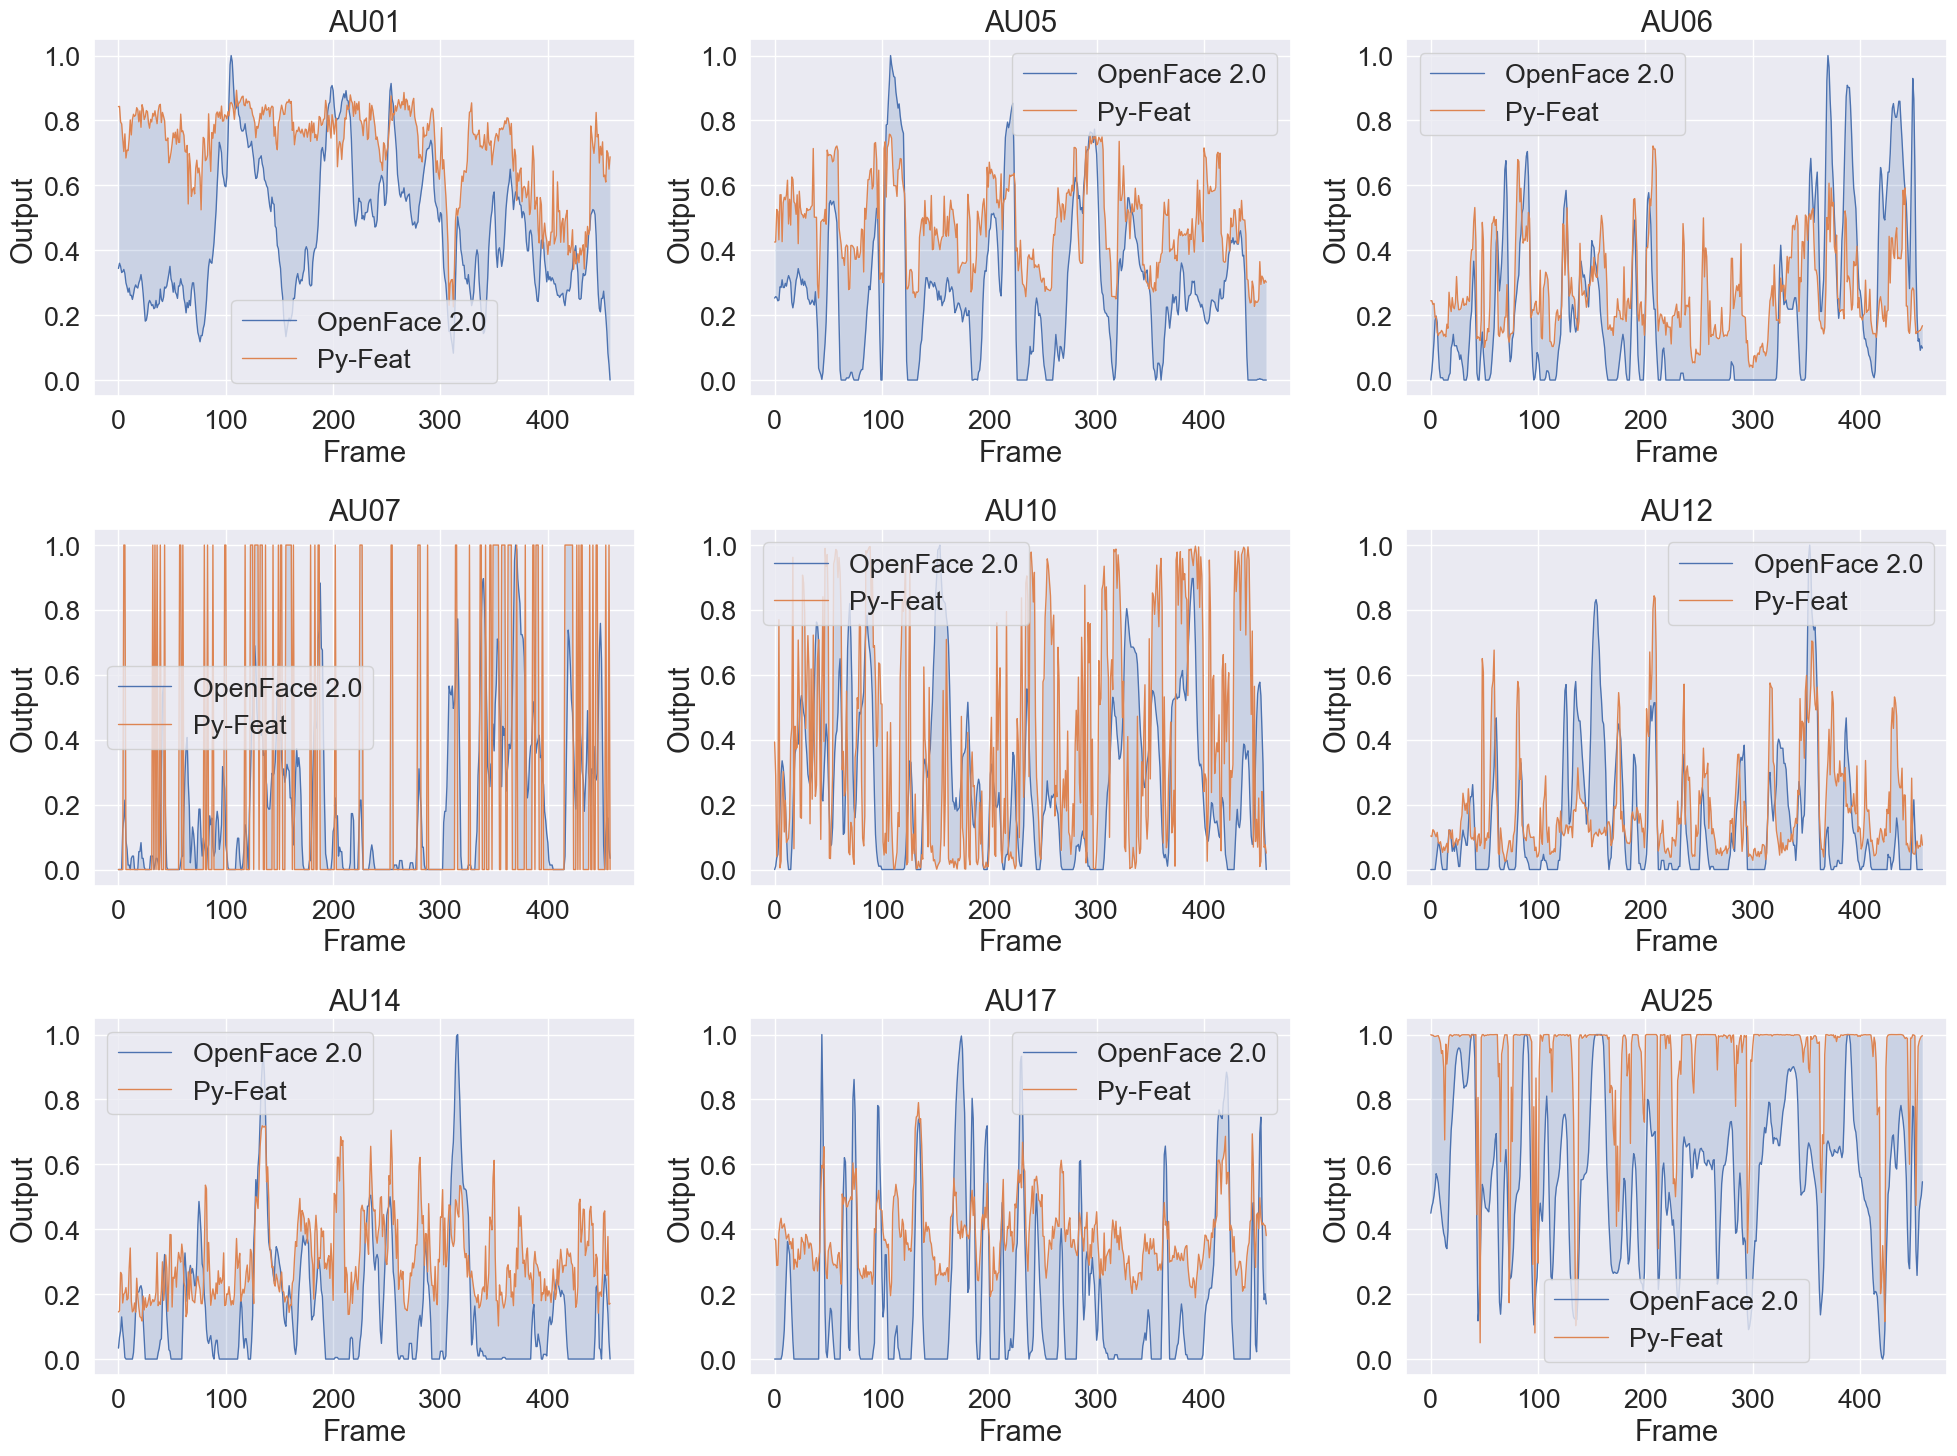

<Figure size 200x200 with 0 Axes>

c:\Users\AdrianLopez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AdrianLopez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AdrianLopez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AdrianLopez\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

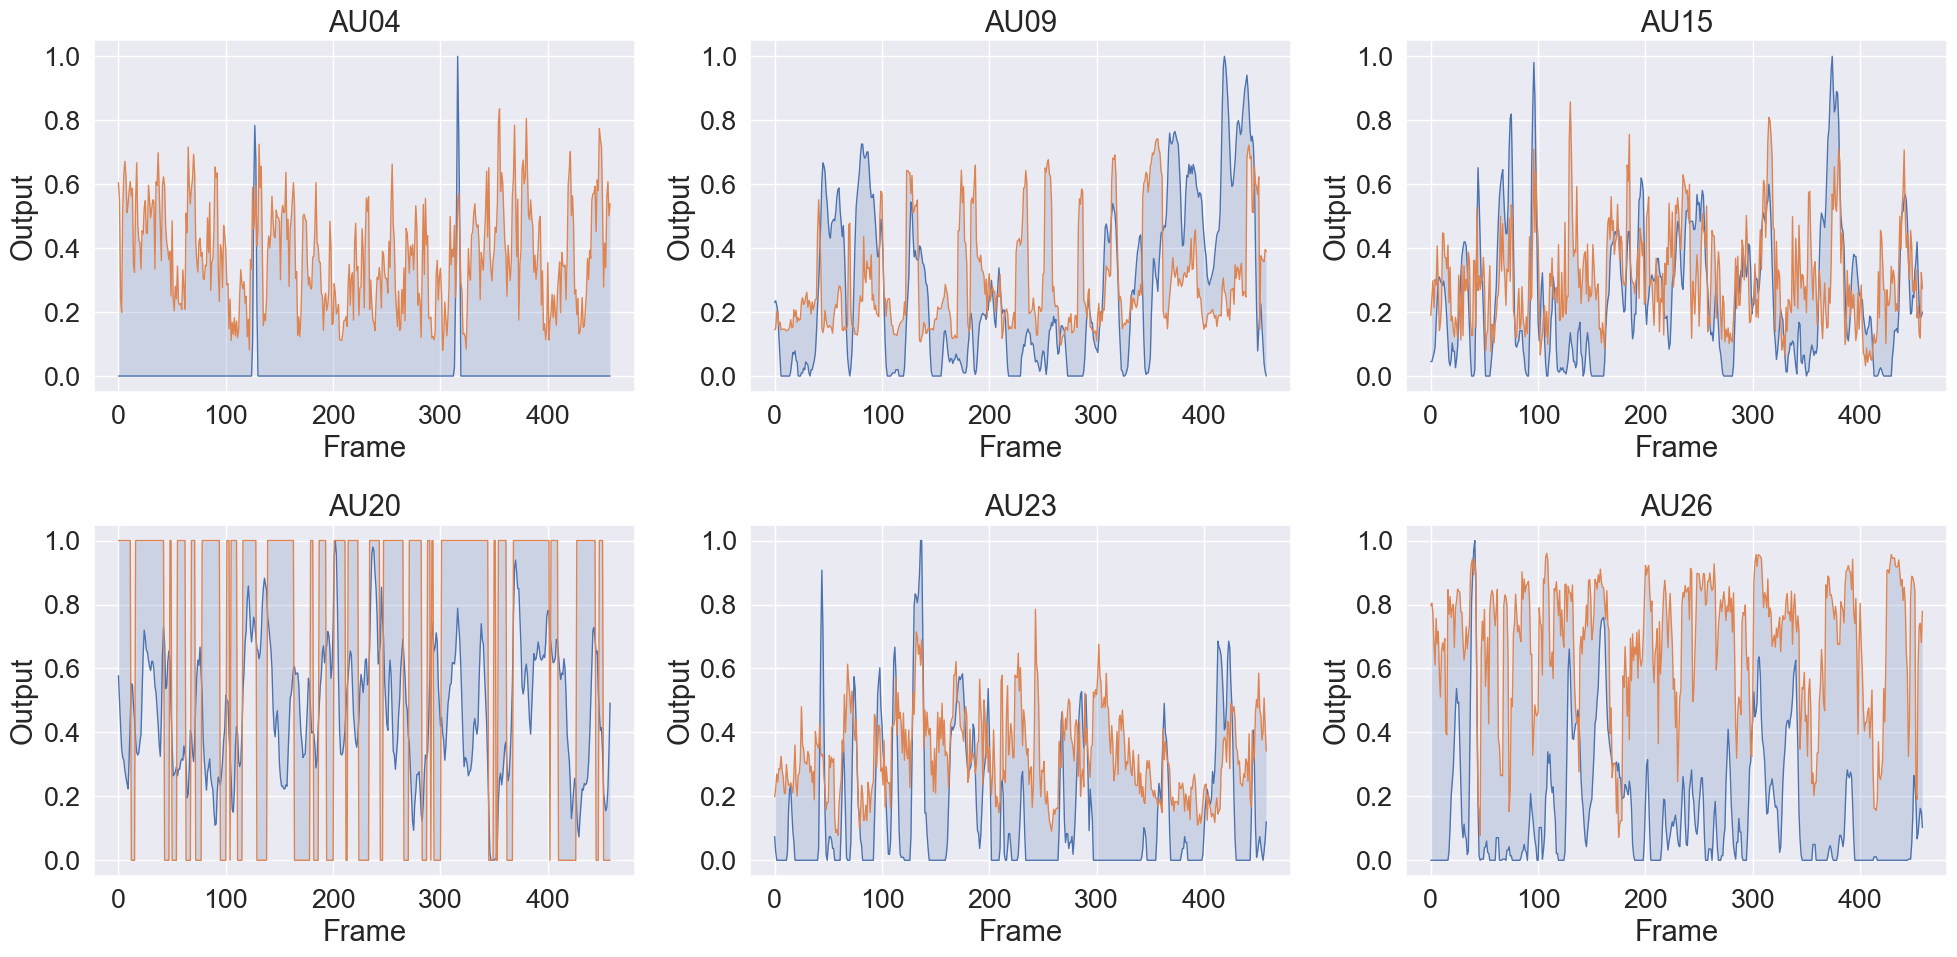

<Figure size 200x200 with 0 Axes>

In [20]:
# 
aus1 = [1, 5, 6, 7, 10, 12, 14, 17, 25]
aus2 = [4, 9, 15, 20, 23, 26]
comparison.plot_AU_comparison_legend(video_idx=8, selected_aus=aus1)
comparison.plot_AU_comparison(video_idx=8, selected_aus=aus2)



In [21]:
#comparison.correlation_ttest()
#comparison.correlation_absttest()
#comparison.correlation_pvalue()
#comparison.boxplot_correlation()
#comparison.boxplot_absttest()
# Ejemplo de uso
#comparison.plot_AU_comparison_subplot(0)
